# Design Pattern 6 - Multilabel (Chapter 3)

## Introduction to Design Pattern

The multilabel pattern in about classifying something

![mutlilabel MLP diagram](./Images/mldp6_multilabel_mlp_diagram.svg)

### Multiclass example - Ground truth

|       | class 1 | class 2 | class 3 |
|-------|---------|---------|---------|
|obs 1  | 1.0 | 0.0 | 0.0 |
|obs 2  | 0.0 | 1.0 | 0.0 |
|obs 3  | 0.0 | 1.0 | 0.0 |

### Multiclass example - output


|       | class 1 | class 2 | class 3 |
|-------|---------|---------|---------|
|obs 1  | 0.84 | 0.1 | 0.06 |
|obs 2  | 0.04 | 0.79 | 0.06 |
|obs 3  | 0.08 | 0.91| 0.06 |

### Multilabel example - ground truth

|       | class 1 | class 2 | class 3 |
|-------|---------|---------|---------|
|obs 1  | 1.0 | 0.0 | 1.0 |
|obs 2  | 0.0 | 1.0 | 1.0 |
|obs 3  | 0.0 | 1.0 | 0.0 |

### Multilabel example - output

|       | class 1 | class 2 | class 3 |
|-------|---------|---------|---------|
|obs 1  | 0.79 | 0.11 | 0.83 |
|obs 2  | 0.05 | 0.89 | 0.72 |
|obs 3  | 0.08 | 0.91 | 0.05 |


### Loss Function - Sigmoid

![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

For multiclass, we use a softmax, here we use a signoid for each
### Balancing dataset - consider presence of different combinations

### Hierarchical labels
Use flat approach, ensure you have enough example of the "leaf" classes in the hierarchy

### Results - Choosing a threshold


## Example python implementation

Textbook example - https://github.com/GoogleCloudPlatform/ml-design-patterns/blob/master/03_problem_representation/multilabel.ipynb

In [1]:
import matplotlib 
import matplotlib.colors
import pandas
import numpy
import matplotlib.pyplot

In [2]:
import sklearn
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
import sklearn.datasets

In [3]:
import tensorflow as tf

In [4]:
cmap_bold = matplotlib.colors.ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
colors = {0: 'red', 1: 'blue', 2: 'green'}
num_features = 2
num_classes = 3
cluster_std = 3.0
grid_size = 25
num_obs = 1000
centres = [[-7.0, 10.0],[4.0,2.0],[-1.0,-3.0]]
num_blobs = len(centres)

In [5]:
# generate 2d classification dataset
X, y_multiclass = sklearn.datasets.make_blobs(n_samples=num_obs, centers=centres, n_features=num_features, cluster_std=cluster_std)

In [6]:
y_mltlbl = (numpy.concatenate(
    [numpy.sqrt(((X[:,0] - centres[0][0]) ** 2) + ((X[:,1] - centres[0][1]) ** 2)).reshape(num_obs,1) ,
        numpy.sqrt(((X[:,0] - centres[1][0]) ** 2) + ((X[:,1] - centres[1][1]) ** 2)).reshape(num_obs,1) ,
        numpy.sqrt(((X[:,0] - centres[2][0]) ** 2) + ((X[:,1] - centres[2][1]) ** 2)).reshape(num_obs,1), ],
    axis=1,
    ) < 10).astype(int)

In [7]:
y_mltlbl.shape

(1000, 3)

In [8]:
y_mltlbl.sum(axis=0)

array([368, 637, 606])

In [9]:
X.shape

(1000, 2)

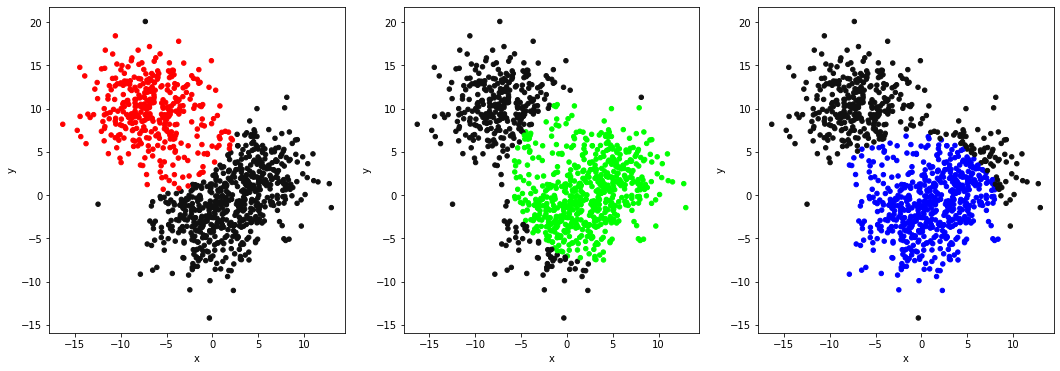

In [12]:
# scatter plot, dots colored by class value
fig1 = matplotlib.pyplot.figure('blobs', figsize=(18,6))
df = pandas.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y_mltlbl[:,0]))
ax1 = fig1.add_subplot(1,3,1)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#FF0000']),
            colorbar=False)

df = pandas.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y_mltlbl[:,1]))
ax1 = fig1.add_subplot(1,3,2)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#00FF00']),
            colorbar=False)

df = pandas.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y_mltlbl[:,2]))
ax1 = fig1.add_subplot(1,3,3)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#0000FF']),
            colorbar=False)

In [14]:
(X_train, X_test,
 y_train, y_test) = sklearn.model_selection.train_test_split(
    X, y_mltlbl, test_size=0.2)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 3), (200, 3))

In [16]:
val_ranges=[(min(X[:,ix1]), max(X[:,ix1])) for ix1 in range(0,X.shape[1])]
grid_x, grid_y = numpy.meshgrid( numpy.arange(val_ranges[0][0], val_ranges[0][1], (val_ranges[0][1] - val_ranges[0][0]) / grid_size),
               numpy.arange(val_ranges[1][0], val_ranges[1][1], (val_ranges[1][1] - val_ranges[1][0]) / grid_size))
grid_x = grid_x.flatten()
grid_y = grid_y.flatten()
X_grid = numpy.concatenate([grid_x.reshape(grid_x.shape[0],1), grid_y.reshape(grid_y.shape[0],1)], axis=1)

In [17]:
# Note we're using sigmoid output with binary_crossentropy loss
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(num_blobs, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-09-26 10:32:15.385839: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
X_grid_scale = scaler.transform(X_grid)
df_train = pandas.DataFrame(dict(x=X_train[:, 0], y=X_train[:, 1], label_red=y_train[:,0], label_green=y_train[:,1], label_blue=y_train[:,2]))
df_train_scale = pandas.DataFrame(dict(x=X_train_scale[:, 0], y=X_train_scale[:, 1], label_red=y_train[:,0], label_green=y_train[:,1], label_blue=y_train[:,2]))
df_test = pandas.DataFrame(dict(x=X_test[:, 0], y=X_test[:, 1], label_red=y_test[:,0], label_green=y_test[:,1], label_blue=y_test[:,2]))
df_test_scale = pandas.DataFrame(dict(x=X_test_scale[:, 0], y=X_test_scale[:, 1], label_red=y_test[:,0], label_green=y_test[:,1], label_blue=y_test[:,2]))

In [23]:
threshold=0.5

In [42]:
model.fit(X_train_scale, 
          y_train, 
          epochs=10, 
          batch_size=16, 
          validation_split=0.1)


Epoch 1/10
45/45 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.5778 - val_loss: 0.5774 - val_accuracy: 0.5500
Epoch 2/10
45/45 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7278 - val_loss: 0.4280 - val_accuracy: 0.9000
Epoch 3/10
45/45 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8125 - val_loss: 0.3058 - val_accuracy: 0.8250
Epoch 4/10
45/45 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.7583 - val_loss: 0.2495 - val_accuracy: 0.7625
Epoch 5/10
45/45 [==============================] - 0s 1ms/step - loss: 0.2114 - accuracy: 0.7375 - val_loss: 0.2218 - val_accuracy: 0.7500
Epoch 6/10
45/45 [==============================] - 0s 1ms/step - loss: 0.1927 - accuracy: 0.7125 - val_loss: 0.2025 - val_accuracy: 0.7125
Epoch 7/10
45/45 [==============================] - 0s 1ms/step - loss: 0.1791 - accuracy: 0.7000 - val_loss: 0.1875 - val_accuracy: 0.7125
Epoch 8/10
45/45 [==

In [43]:
y_pred_train = (model.predict(X_train_scale) > threshold).astype(int)
y_pred_test = (model.predict(X_test_scale) > threshold).astype(int)
y_pred_grid = (model.predict(X_grid_scale) > threshold).astype(int)

In [44]:
y_train.sum(axis=0), y_test.sum(axis=0)

(array([291, 513, 491]), array([ 77, 124, 115]))

In [45]:
(model.predict(X_train_scale) > 0.5).sum(axis=0)

array([268, 536, 487])

In [46]:
y_pred_train.sum(axis=0), y_pred_test.sum(axis=0), 

(array([268, 536, 487]), array([ 73, 129, 121]))

In [47]:
y_pred_grid.shape, y_pred_grid.sum(axis=0)

((650, 3), array([286, 366, 335]))

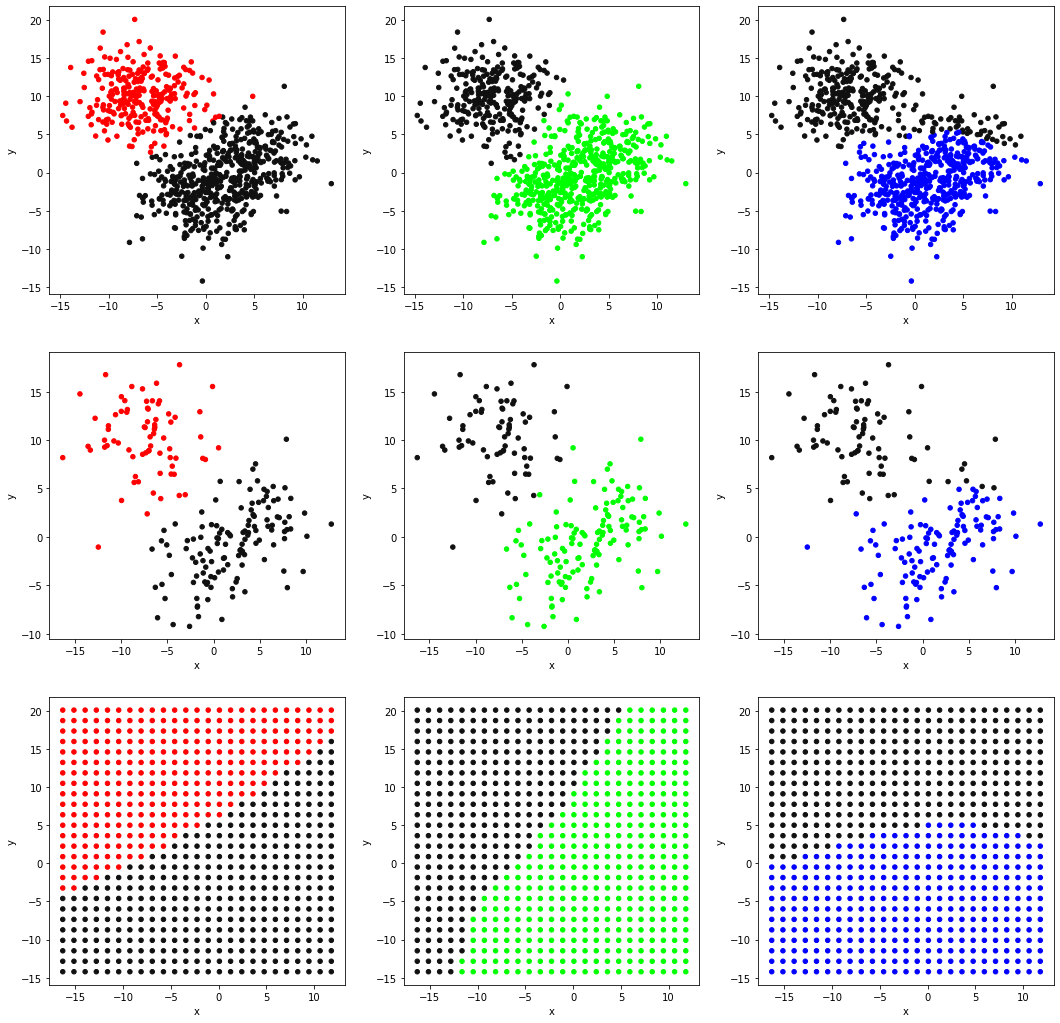

In [50]:
# scatter plot, dots colored by class value
fig1 = matplotlib.pyplot.figure('blobs', figsize=(18,18))
df = pandas.DataFrame(dict(x=X_train[:, 0], y=X_train[:, 1], label=y_pred_train[:,0]))
ax1 = fig1.add_subplot(3,3,1)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#FF0000']),
            colorbar=False)

df = pandas.DataFrame(dict(x=X_train[:, 0], y=X_train[:, 1], label=y_pred_train[:,1]))
ax1 = fig1.add_subplot(3,3,2)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#00FF00']),
            colorbar=False)

df = pandas.DataFrame(dict(x=X_train[:, 0], y=X_train[:, 1], label=y_pred_train[:,2]))
ax1 = fig1.add_subplot(3,3,3)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#0000FF']),
            colorbar=False)

df = pandas.DataFrame(dict(x=X_test[:, 0], y=X_test[:, 1], label=y_pred_test[:,0]))
ax1 = fig1.add_subplot(3,3,4)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#FF0000']),
            colorbar=False)

df = pandas.DataFrame(dict(x=X_test[:, 0], y=X_test[:, 1], label=y_pred_test[:,1]))
ax1 = fig1.add_subplot(3,3,5)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#00FF00']),
            colorbar=False)

df = pandas.DataFrame(dict(x=X_test[:, 0], y=X_test[:, 1], label=y_pred_test[:,2]))
ax1 = fig1.add_subplot(3,3,6)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#0000FF']),
            colorbar=False)

df = pandas.DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=y_pred_grid[:,0]))
ax1 = fig1.add_subplot(3,3,7)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#FF0000']),
            colorbar=False)

df = pandas.DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=y_pred_grid[:,1]))
ax1 = fig1.add_subplot(3,3,8)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#00FF00']),
            colorbar=False)

df = pandas.DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=y_pred_grid[:,2]))
ax1 = fig1.add_subplot(3,3,9)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',
            cmap=matplotlib.colors.ListedColormap(['#101010', '#0000FF']),
            colorbar=False)




## Real world examples


Try to include some actual/possible examples of where this DP could be used in a weather and climate context.
* classifying objects in an image with multiple images
* applying adjectives that are not mutually exclusive

weather & climate
* classifying features in a satellite image or model run, where may be multiple, example hurricane, high pressure, cold front etc.
